<a href="https://colab.research.google.com/github/ua-datalab/Workshops/blob/main/Exploratory_Data_Analysis/ExploratoryDataAnalysis_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Jupyter Notebook Exploratory Data Analysis Example
(Created 11-01-2022)

Save the Jupyter Notebook into your defined working directory.

Use this Docker [Jupyter Base Notebook](https://hub.docker.com/r/jupyter/base-notebook) to run this notebook.

Use: `docker pull jupyter/base-notebook`to download this Docker image to your computer.

Then execute: `docker run -it --rm -v "${PWD}":/home/jovyan/work -p 8888:8888 jupyter/base-notebook`

The Docker container wil run in your default browser tab.

Your `$HOME` directory will be mapped into the `/work`directory inside your Jupyter Notebook environment.



In [1]:
# See if seaborn is installed
import seaborn as sns

sns.__version__

'0.13.1'

In [ ]:
# Using the `pip` command install the latest Seaborn library and dependencies for this Jupyter Notebook
# Seaborn version greater than 0.12 is needed.
!pip install seaborn

# Load Seaborn into working memory
import seaborn as sns

# Prints the version of Seaborn
sns.__version__

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 2.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 2.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 2.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 917.0 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 291.2 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 1.2 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 749.4 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.1/296.1 kB 419.7 kB/s eta 0:00:00a 0:00:01


'0.12.1'

In [ ]:
# Import necessary Python libraries
import numpy as np
import matplotlib.pyplot as plt

# Will use this Seaborn.objects
import seaborn.objects as so

import pandas as pd
#import sidetable

# SHIF+ENTER to execute cells

In [ ]:
# Seaborn includes sample datasets
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
# Load Penguins dataset
df0 = sns.load_dataset('penguins')
df0.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
# Print dataframe information
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
# Print numer of missing values
df0.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
# Make a copy of original dataframe and create new working dataframe
df1 = df0.copy()

# Drop rwos with missing values
df1 = df1.dropna()

# Show dataframe information
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [ ]:
# Descriptive Statistics of numeric variables
df1.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
# Descriptive statistocs of categorical variables
df1[ ['species', 'island', 'sex']].describe()

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,146,163,168


## Data visualization with Seaborn

**References**
- [Seaborn documentation](https://seaborn.pydata.org/tutorial/introduction.html)
- [Seaborn.objects documentation](https://seaborn.pydata.org/generated/seaborn.objects.Plot.html#)
- [Data Visualization with Python](https://github.com/clizarraga-UAD7/Workshops/wiki/Data-Visualization-with-Python)
- [Data Visualization with Python - Jupyter Notebook Example](https://github.com/clizarraga-UAD7/Notebooks/blob/main/Data_Visualization_with_Python2.ipynb)


In [ ]:
# Redefine working dataframe to df
df = df1.copy()

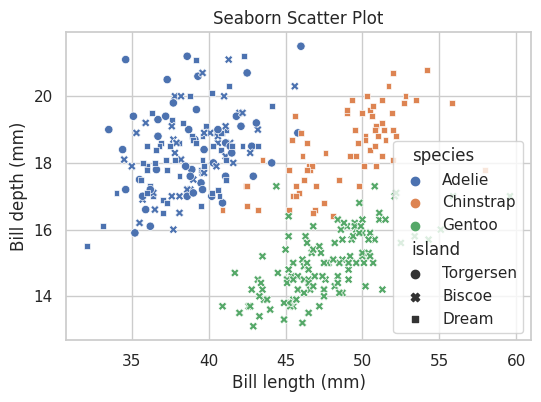

In [ ]:
# Seaborn

#define figure size and Seaborn style
sns.set(rc={"figure.figsize":(6, 4)}) #width=12, height=8
sns.set_style("whitegrid")

# Scatterplot
sns.scatterplot(data=df, x="bill_length_mm", y="bill_depth_mm", hue="species", style="island").set(
    xlabel="Bill length (mm)", ylabel="Bill depth (mm)", title="Seaborn Scatter Plot");


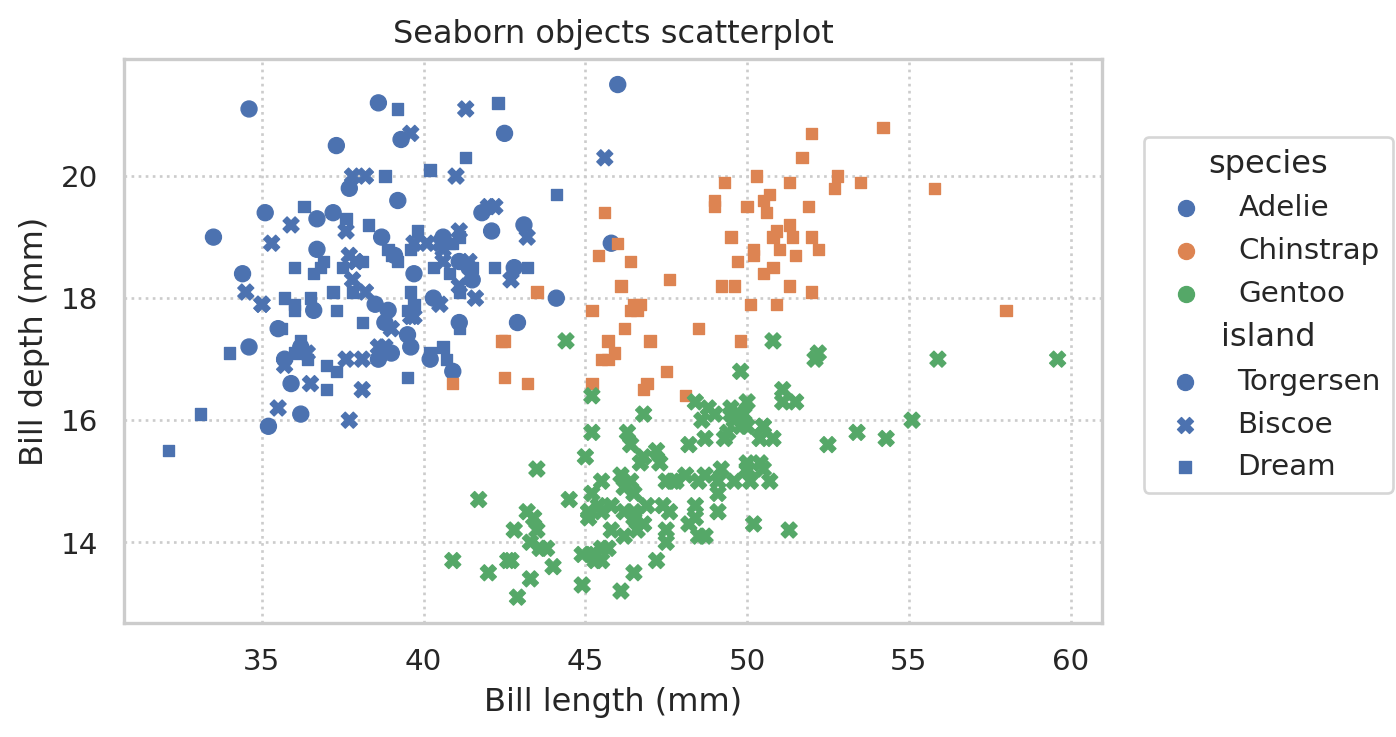

In [ ]:
# With Seaborn objects
from seaborn import axes_style

(
    so.Plot(
        df, x="bill_length_mm", y="bill_depth_mm", color="species", marker="island"
    )
    .add(so.Dot()).layout(size=(6, 4)).theme({**axes_style("whitegrid"), "grid.linestyle": ":"})
    .label(
        x="Bill length (mm)", y="Bill depth (mm)",title="Seaborn objects scatterplot"
    )
)

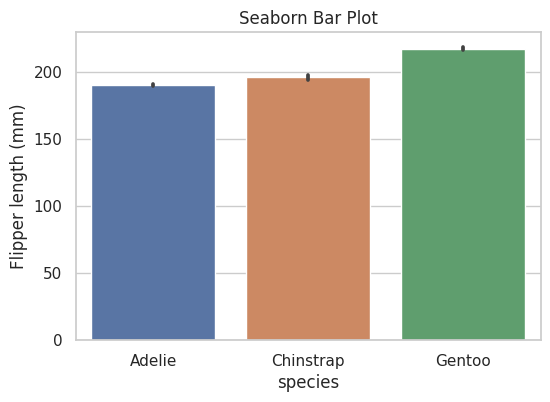

In [ ]:

# Using Seaborn barplot

sns.barplot(x=df['species'],y=df['flipper_length_mm']).set(ylabel="Flipper length (mm)", title="Seaborn Bar Plot");



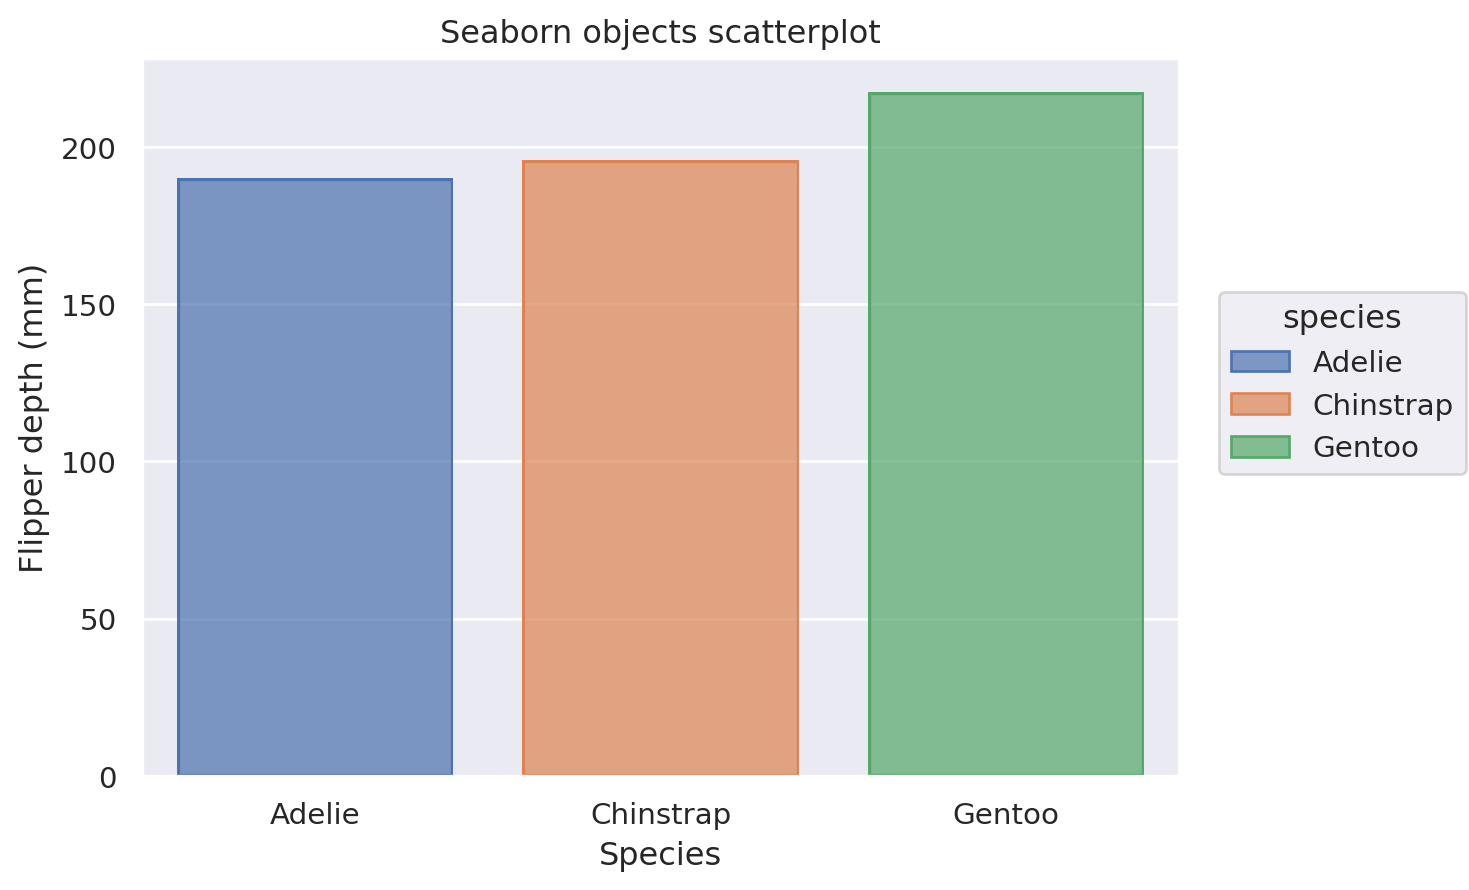

In [ ]:
# Seaborn objects barplot
(
    so.Plot(df, x="species", y="flipper_length_mm", color="species")
    .add(so.Bar(), so.Agg())
    .label(
        x="Species", y="Flipper depth (mm)",title="Seaborn objects scatterplot"
    )
)


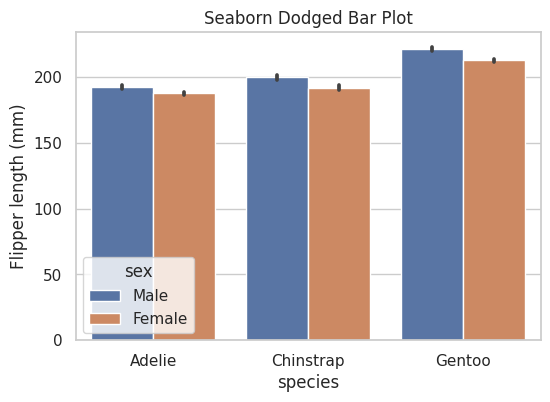

In [ ]:
# Using Seaborn barplot

sns.barplot(data=df, x='species',y='flipper_length_mm', hue='sex', dodge=True).set(ylabel="Flipper length (mm)",
                                                                                   title="Seaborn Dodged Bar Plot");


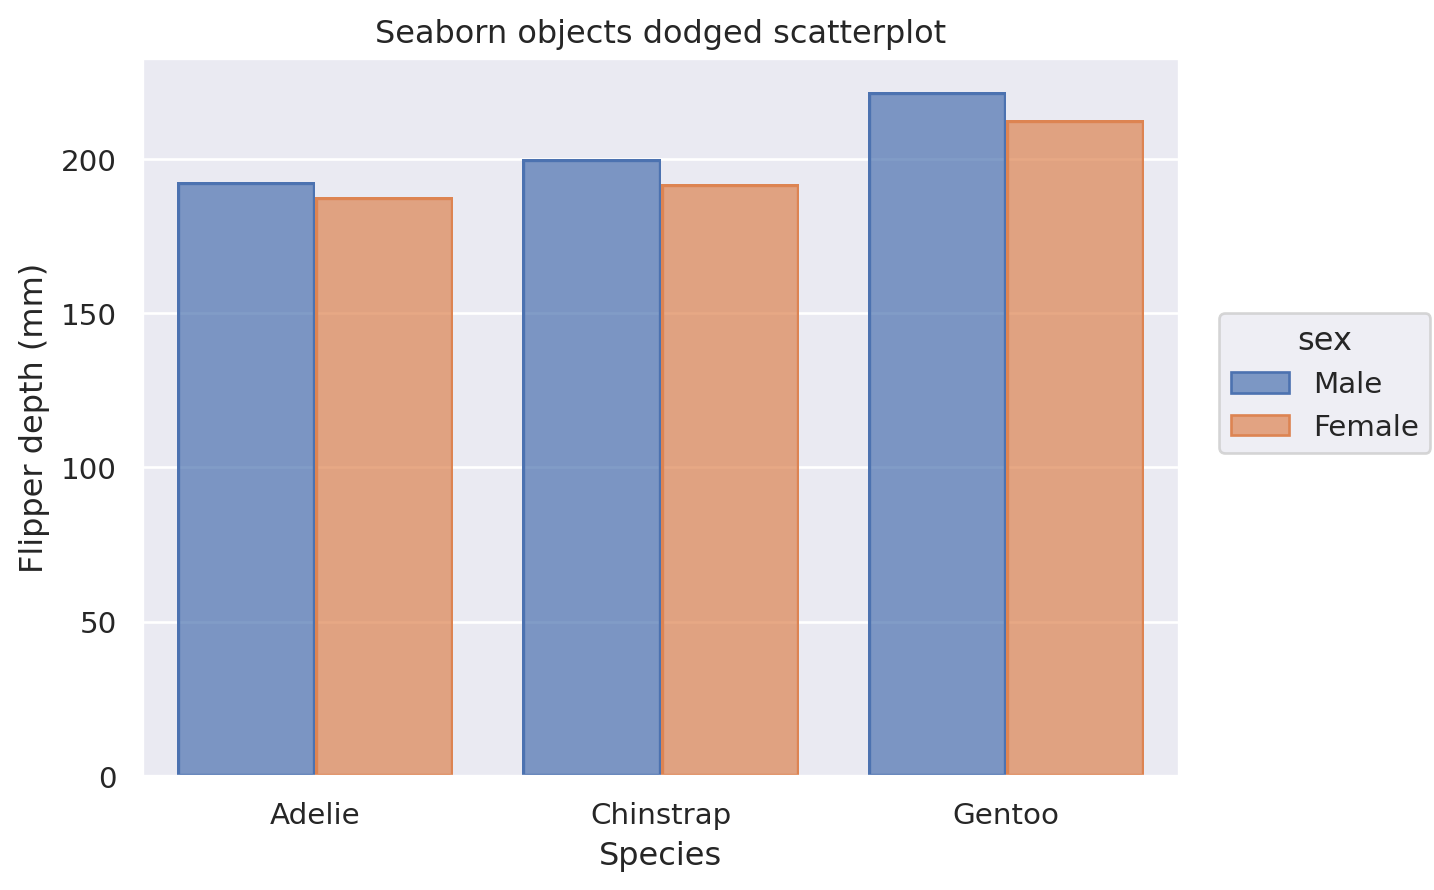

In [ ]:
# Seaborn objects barplot
(
    so.Plot(df, x="species", y="flipper_length_mm", color="sex")
    .add(so.Bar(), so.Agg(), so.Dodge())
    .label(
        x="Species", y="Flipper depth (mm)",title="Seaborn objects dodged scatterplot"
    )
)

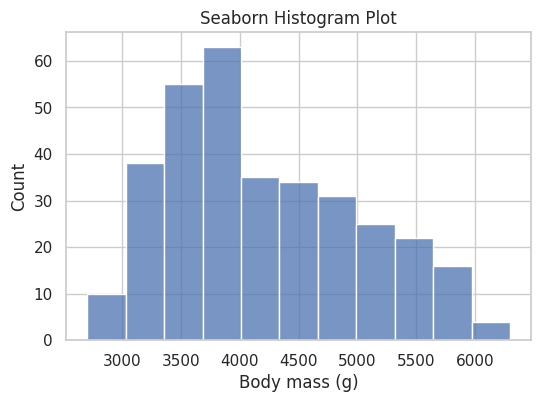

In [ ]:
# Seaborn histogram

sns.histplot(df['body_mass_g']).set(
    xlabel="Body mass (g)", title="Seaborn Histogram Plot");


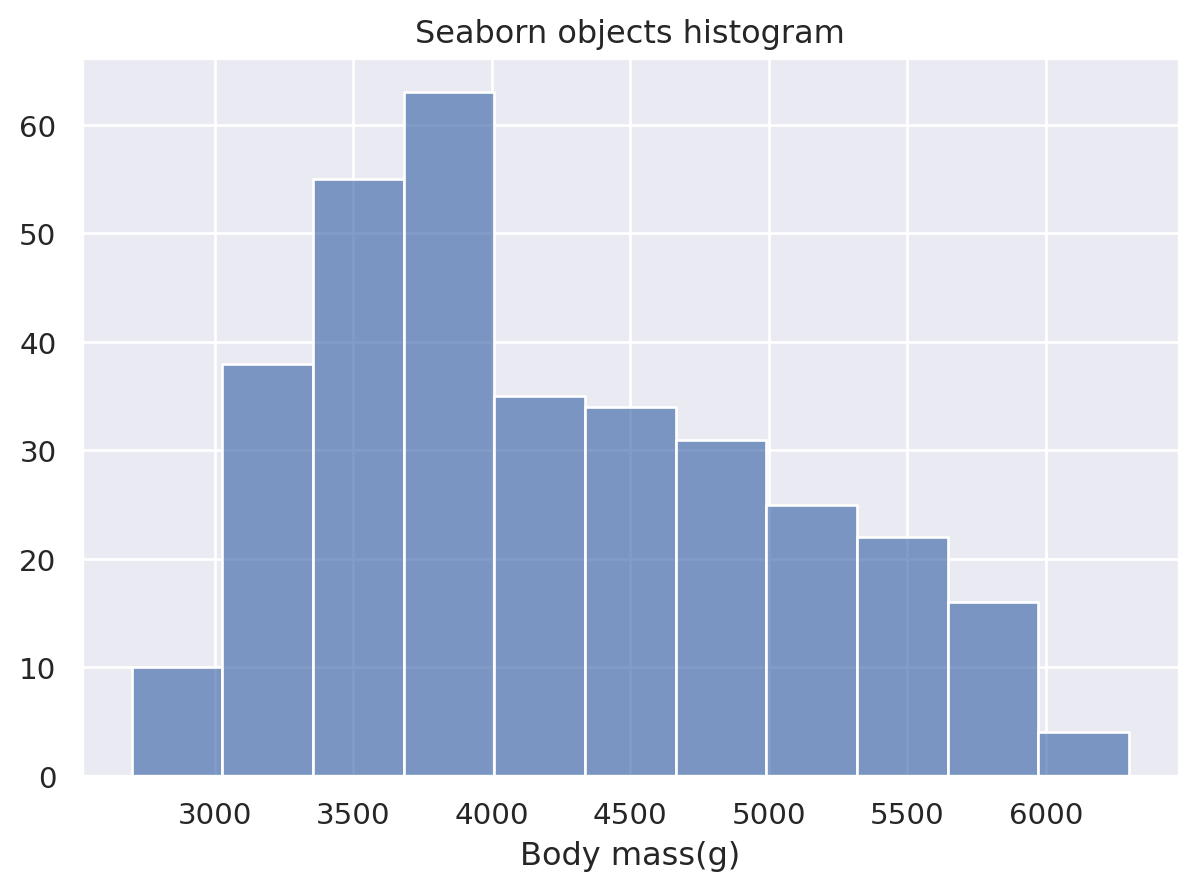

In [ ]:
# Seaborn objects histogram

(
    so.Plot(df, x="body_mass_g")
    .add(so.Bars(), so.Hist()).label(
        x="Body mass(g)",title="Seaborn objects histogram"
    )
)


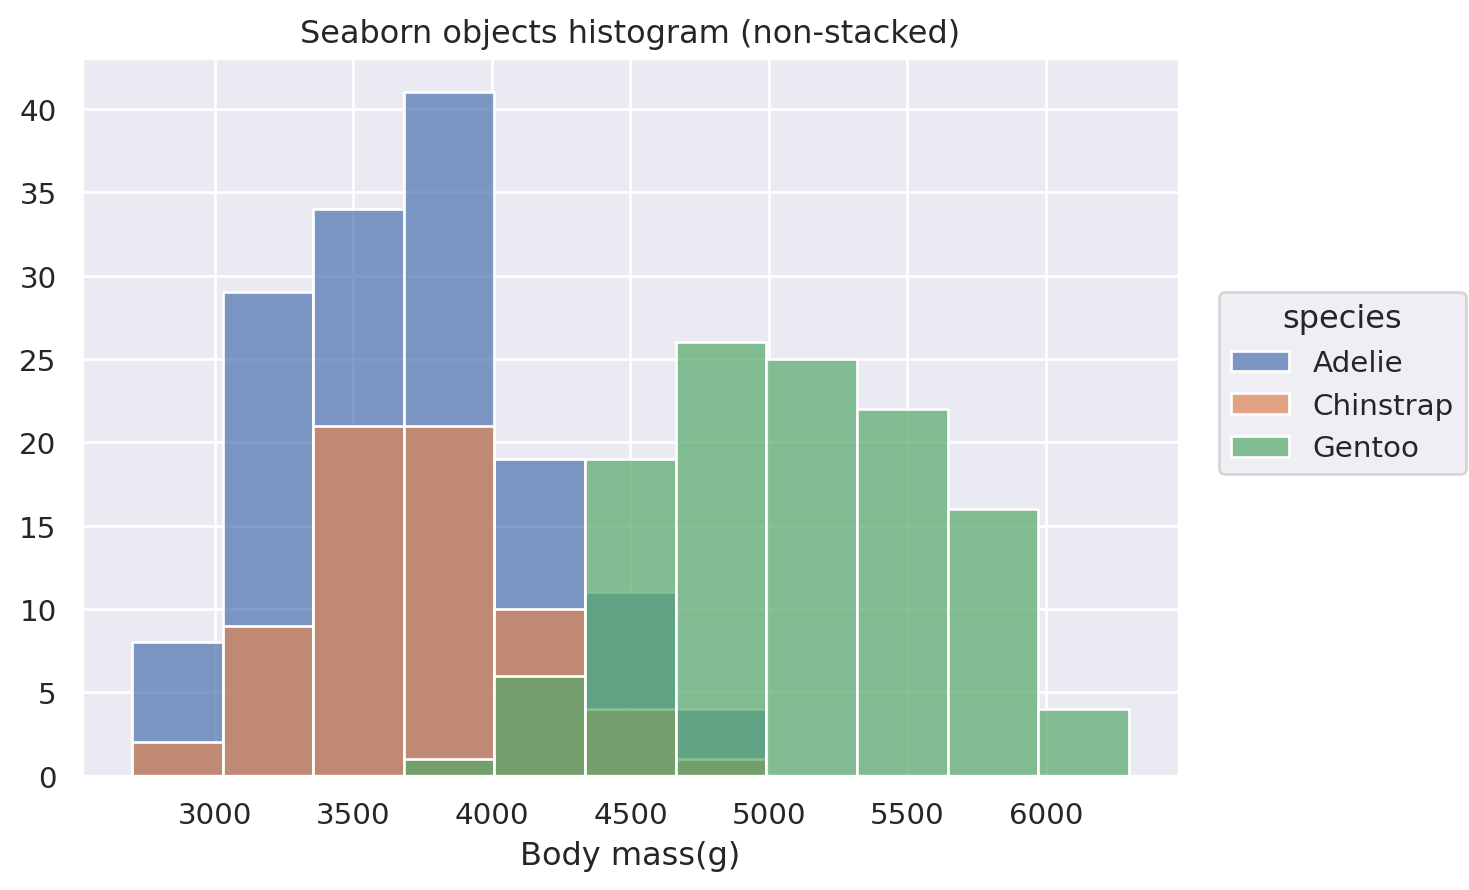

In [ ]:
# Define basic plot and add properties
p = so.Plot(df, "body_mass_g", color="species")
p.add(so.Bars(), so.Hist()).label(
        x="Body mass(g)",title="Seaborn objects histogram (non-stacked)"
    )

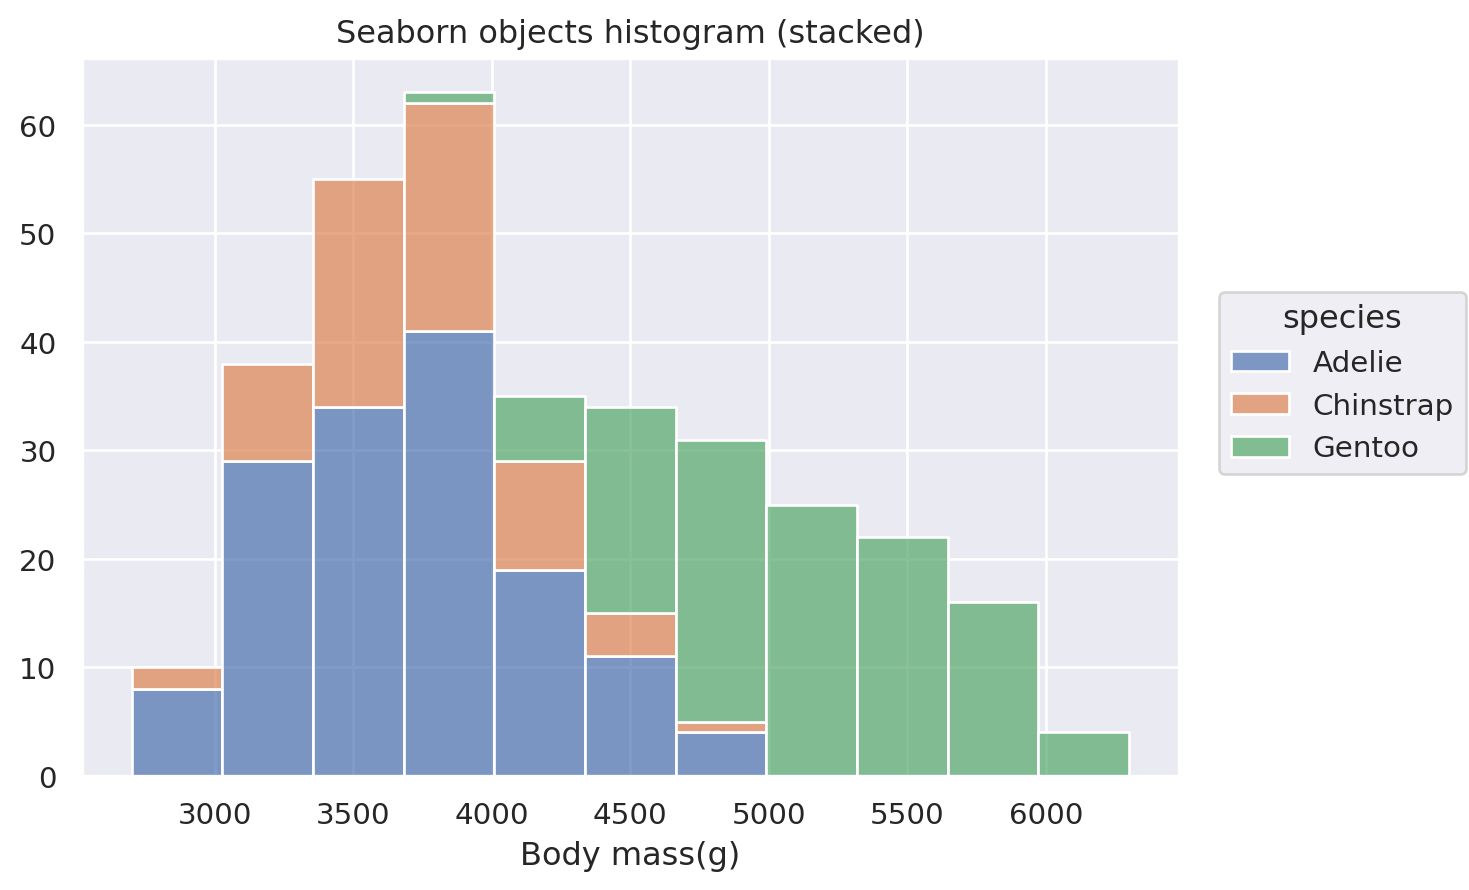

In [ ]:
p.add(so.Bars(), so.Hist(), so.Stack(), color="species").label(
        x="Body mass(g)",title="Seaborn objects histogram (stacked)"
    )

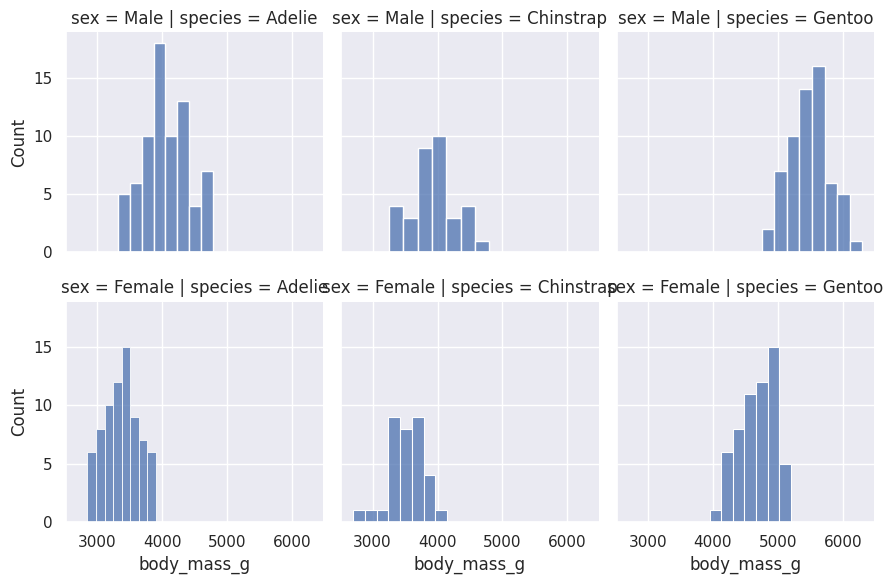

In [ ]:
sns.set(rc={"figure.figsize":(4, 4)})
g = sns.FacetGrid(df, col="species",  row="sex")
g.map_dataframe(sns.histplot, x="body_mass_g");


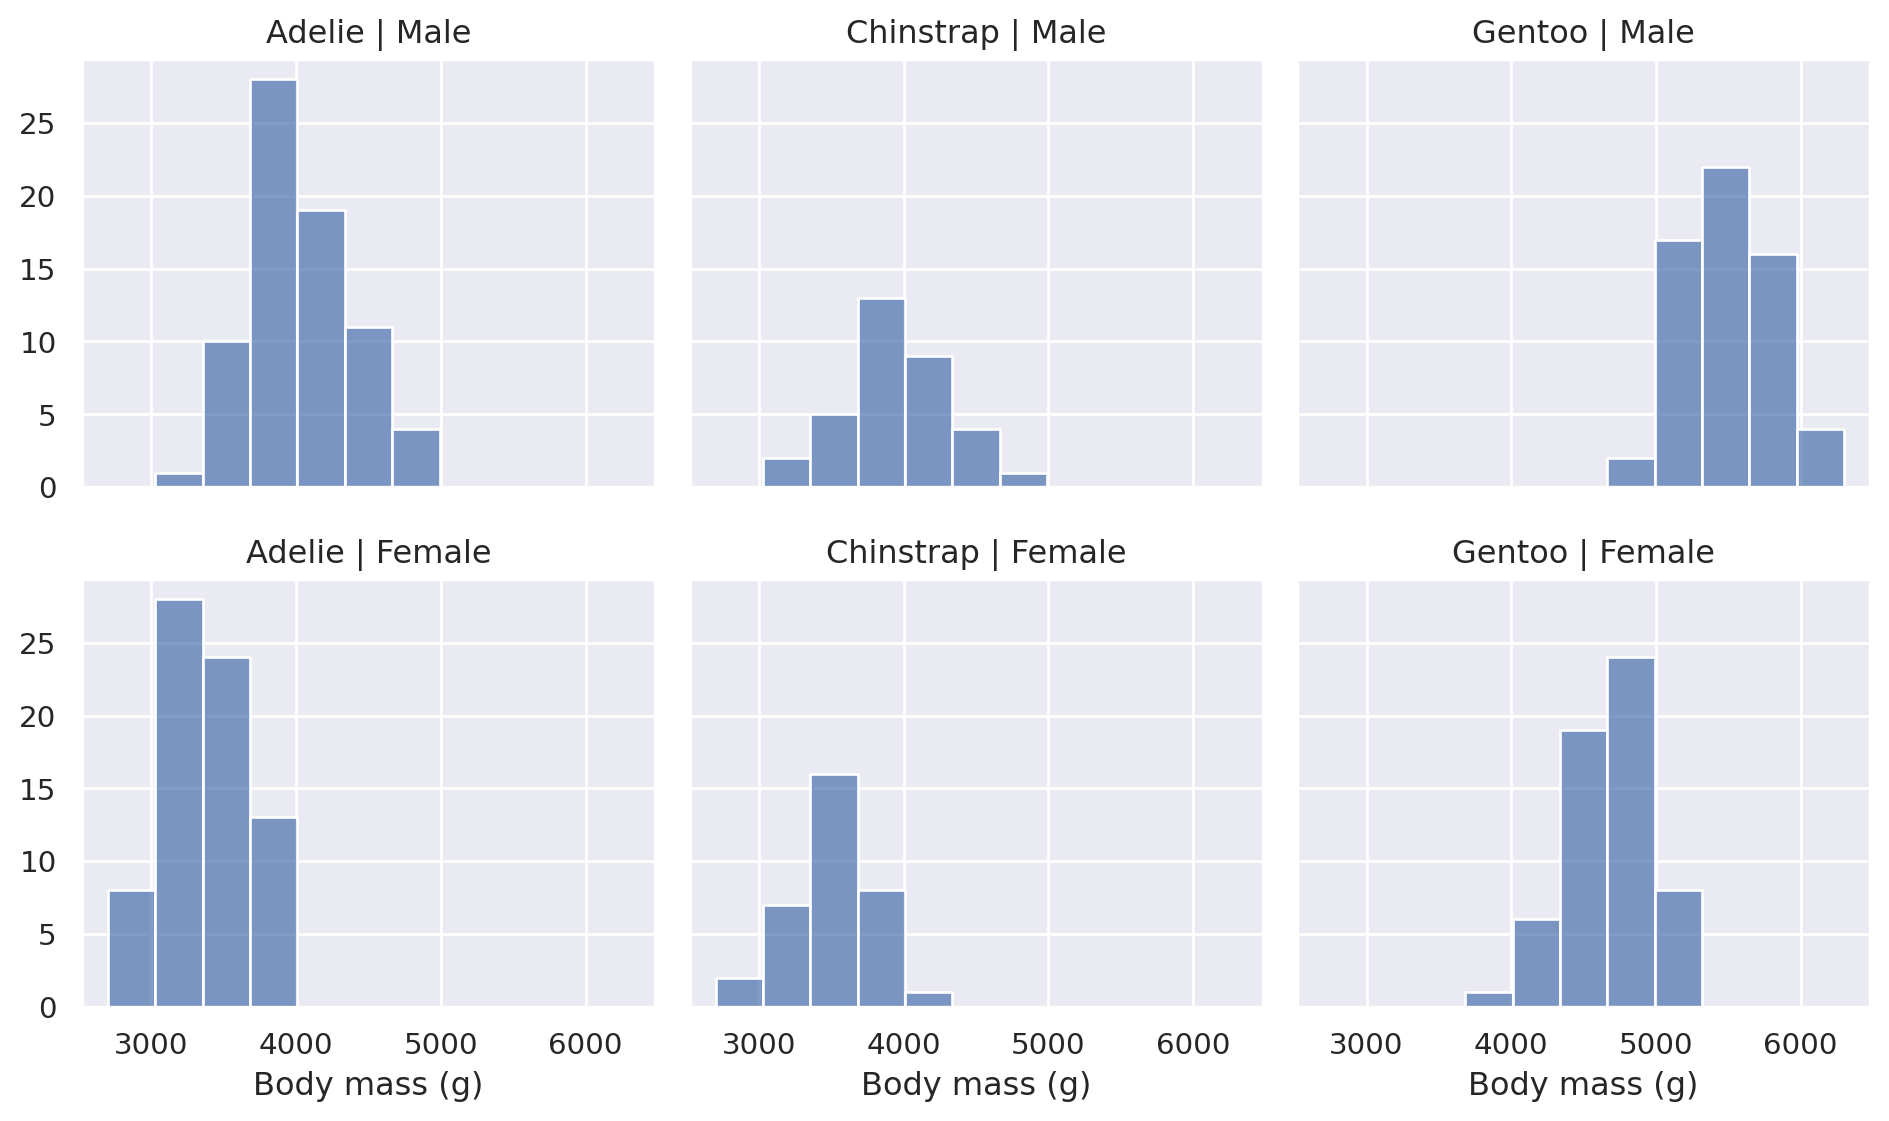

In [ ]:
(
    so.Plot(df, x="body_mass_g")
    .facet(col="species", row="sex")
    .add(so.Bars(), so.Hist()).label(
        x="Body mass (g)"
    ).layout(size=(10, 6))
)


## Not yet implemented in seaborn.objects

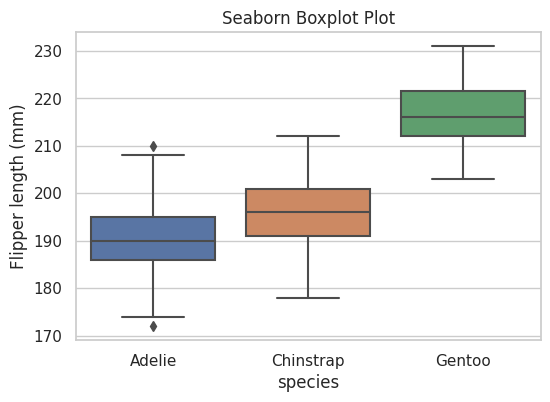

In [ ]:
# Seaborn boxplots

sns.boxplot(data=df, x="species", y="flipper_length_mm").set(
    ylabel="Flipper length (mm)", title="Seaborn Boxplot Plot");


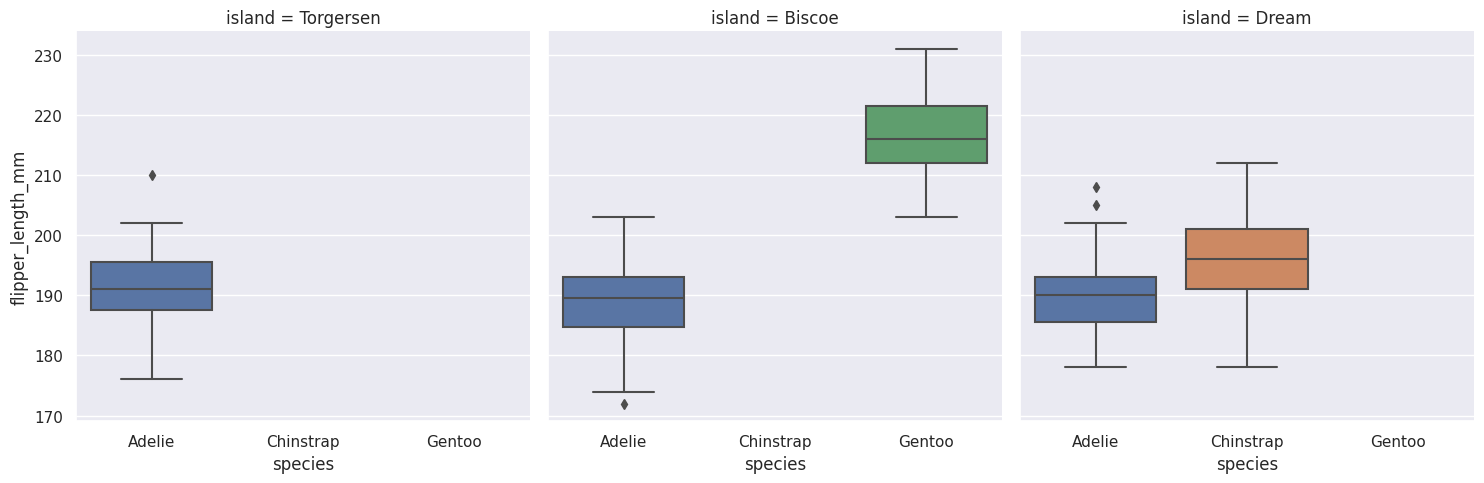

In [ ]:
sns.catplot(data=df, x='species',y='flipper_length_mm', kind='box', col='island');

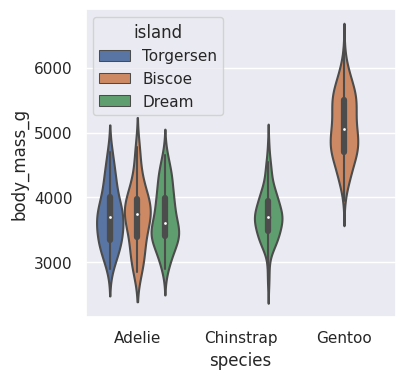

In [ ]:
# Seaborn violin plot

sns.violinplot(data=df, x='species', y='body_mass_g', hue='island', height=12);

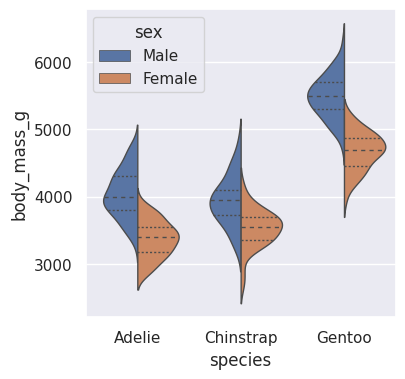

In [ ]:
# Seaborn violin plot

sns.violinplot(data=df, x='species', y='body_mass_g', hue='sex',
               split=True, inner="quart", linewidth=1);

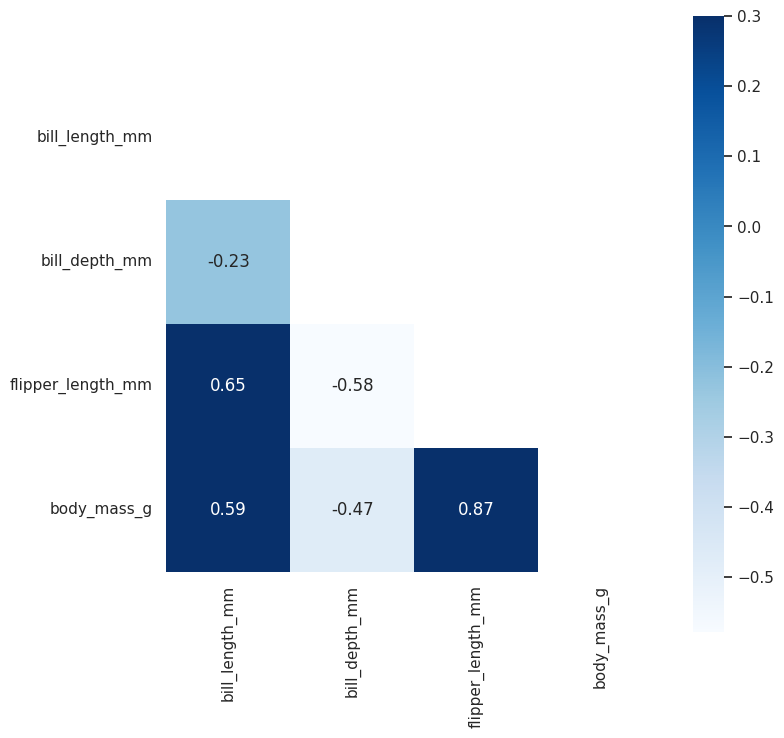

In [ ]:
# Seaborn Masked correlation heatmap
#corr = df.corr()
# Select only numeric columns
corr = df.select_dtypes(include=np.number).corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  f, ax = plt.subplots(figsize=(8, 8))
  ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, cmap='Blues');


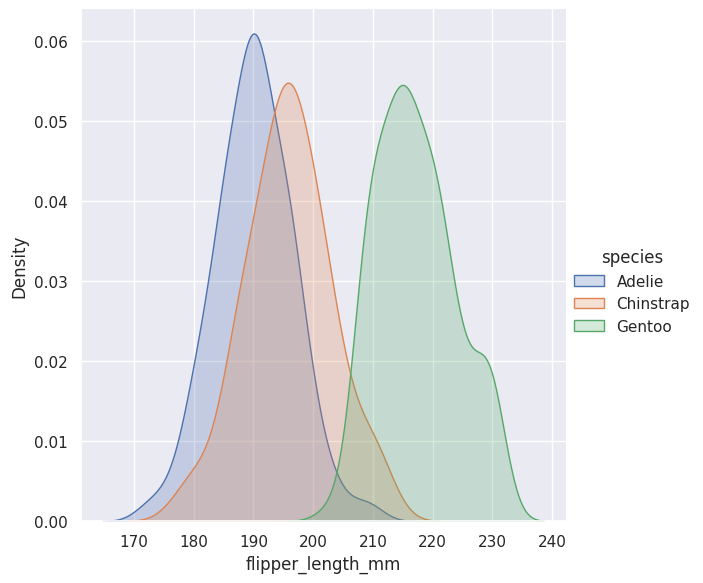

In [ ]:
# Seaborn KDE plots

sns.FacetGrid(df, hue="species", height=6,) \
   .map(sns.kdeplot, "flipper_length_mm", fill=True) \
   .add_legend();


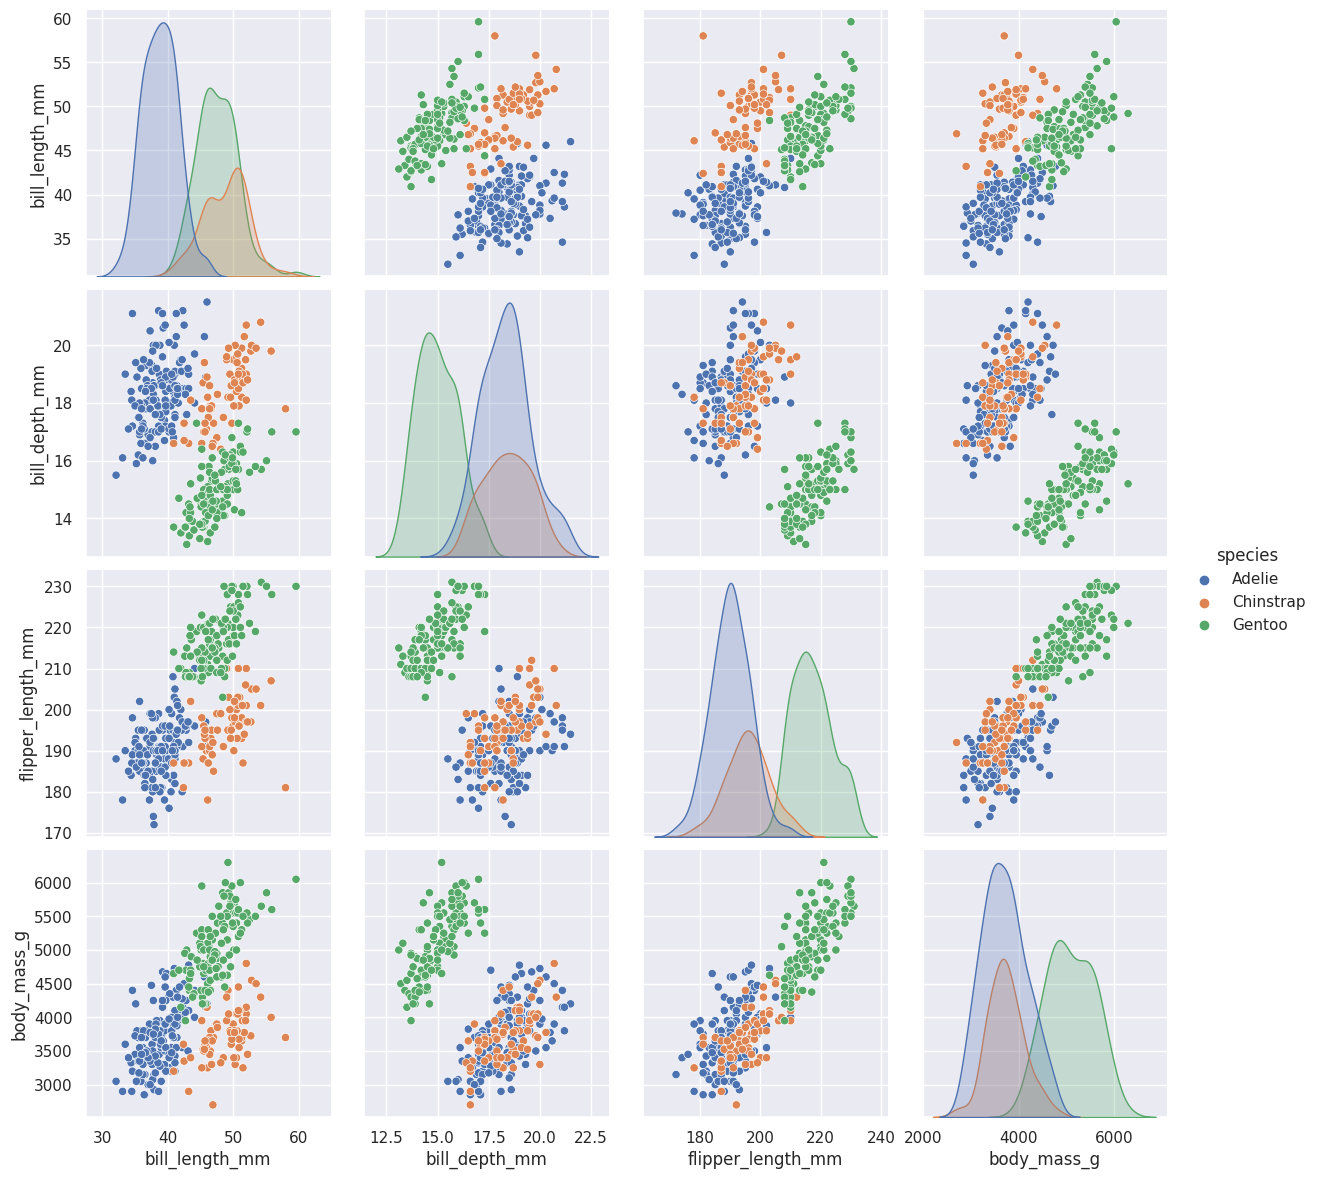

In [ ]:
# Seaborn pairplot using KDE plots
sns.pairplot(df, hue='species', height=3);


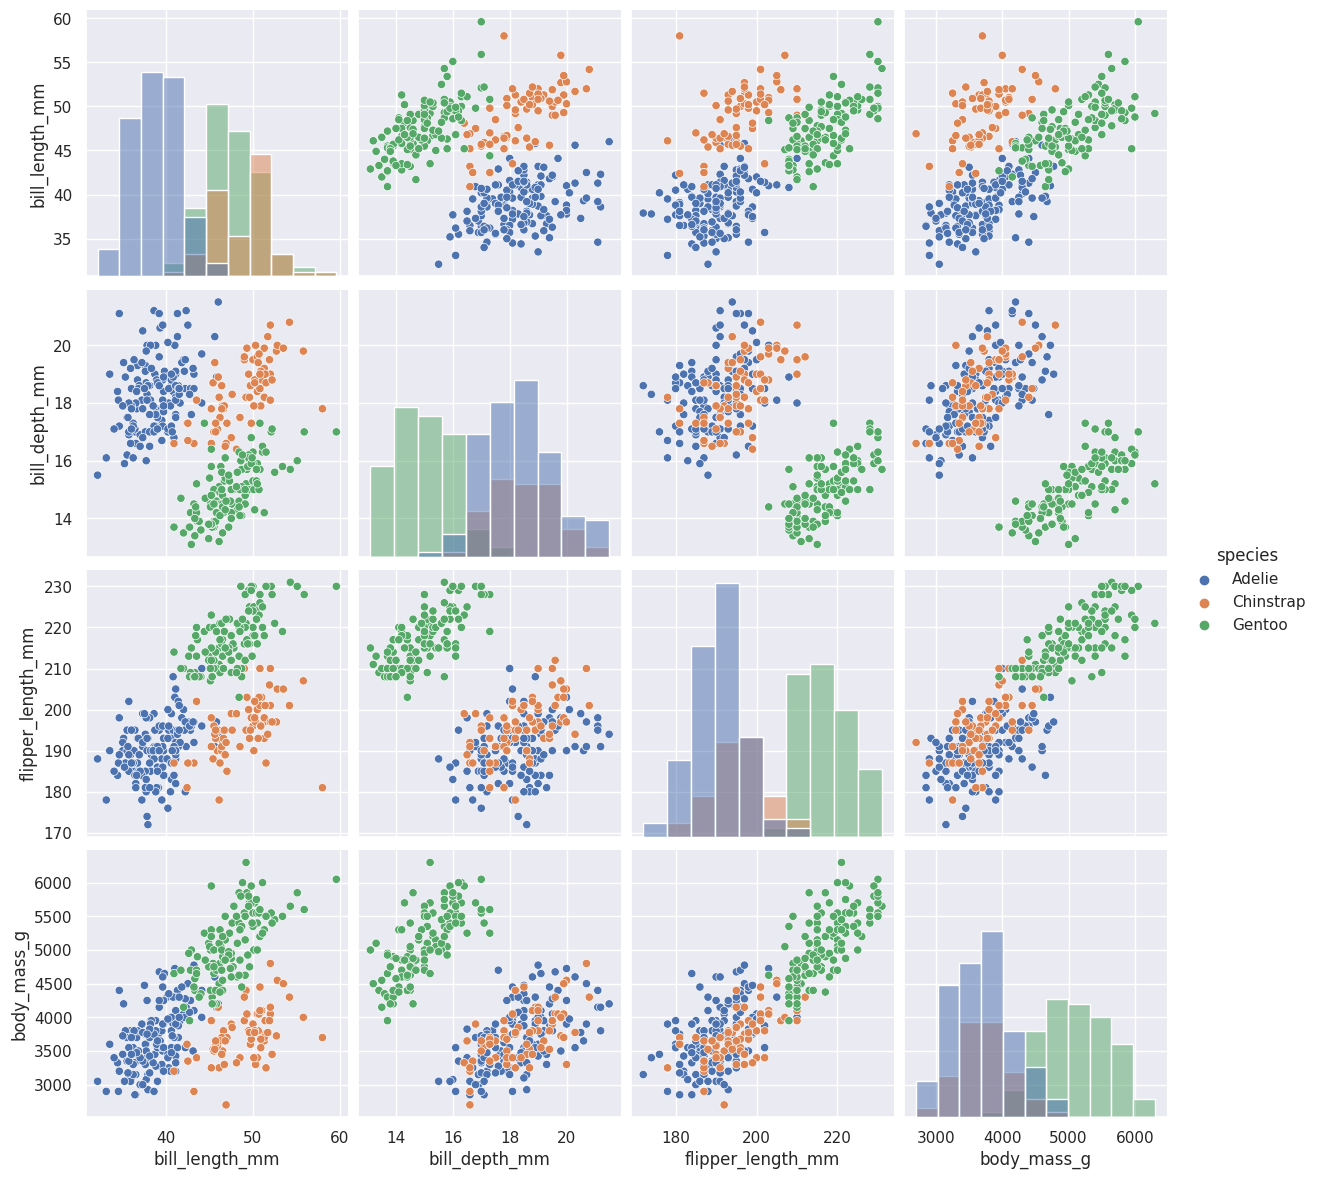

In [ ]:
# Pairplot using histograms
sns.pairplot(df, hue="species", height=3, diag_kind="hist");